In [ ]:
!pip install rembg
!pip install diffusers transformers accelerate safetensors

### Defining functions and model loading

In [ ]:
import rembg
import numpy as np
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import torch
from diffusers import AutoPipelineForInpainting
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForInpainting.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16, variant="fp16"
)
pipeline.enable_model_cpu_offload()

def transform_array(array):
  """Transforms a 2D array, setting 0s to 255 and other values to 0.
  Args:
    array: The input 2D NumPy array.
  Returns:
    The transformed array.
  """
  transformed_array = np.where(array == 0, 255, 0)
  return transformed_array

def bg_remover(input_image):

  input_array = np.array(input_image)   # Convert the input image to a numpy array
  output_array = rembg.remove(input_array, only_mask=True)    # Apply background removal using rembg
  background_mask = transform_array(output_array)
  background_mask = background_mask.astype(np.uint8)
  mask = Image.fromarray(background_mask, mode='L')  #getting the mask for the background

  return mask

def bg_generator(input_image, prompt):
  generator = torch.Generator().manual_seed(42)
  mask=bg_remover(input_image)
  image = pipeline(prompt=prompt, image=input_image, mask_image=mask, generator=generator).images[0]
  return image


### Experiments with the images and prompts

  0%|          | 0/50 [00:00<?, ?it/s]

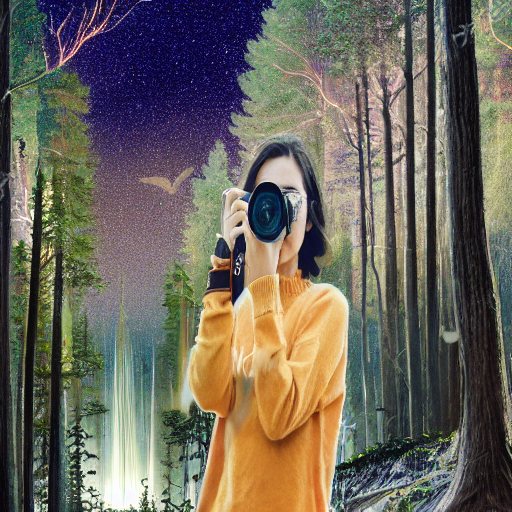

In [4]:
input_image=Image.open('/content/free-images.jpg')
prompt ="A glowing twilight forest with silver-leaved trees, fireflies, and a distant waterfall reflecting soft moonlight."
bg_generator(input_image, prompt)